In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [5]:
pd.options.display.max_columns = 50  # 화면상 출력되는 최대 컬럼수 셋팅
pd.options.display.float_format = '{:.5f}'.format  # 과학적 표기법으로 출력되지 않도록 셋팅
# pd.reset_option('display.float_format')

# EDA 및 전처리 진행(1차)

## movies_metadata.csv : 영화 메타데이터 파일

In [6]:
movies_metadata = pd.read_csv('./data/movies_metadata.csv')
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.94694,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00000,81.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70000,5415.00000
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.01554,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00000,104.00000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90000,2413.00000
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.71290,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00000,101.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50000,92.00000
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00000,127.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10000,34.00000
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.00000,106.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70000,173.00000


In [7]:
movies_metadata.columns  # 컬럼 리스트 확인

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [8]:
movies_metadata.dtypes  # 데이터타입 확인 => 4개 컬럼을 제외하고 모두 object 형태임

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [9]:
movies_metadata.isnull().sum()  # null값들이 존재하는 컬럼 다수 존재

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### 컬럼 구성

#### adult
* Fasle가 대다수이며, True 9건 존재함. 의미가 불분명한 데이터도 존재 => False인 데이터만 추출

In [10]:
movies_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [11]:
# False 또는 True가 아닌 데이터 확인 => 데이터 자체가 잘못 입력된 것으로 보임. 제외 필요
movies_metadata.query('adult != "False" and adult != "True"')

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# "adult"컬럼 값이 False인 값만 추출
movies_metadata_v1 = movies_metadata[movies_metadata['adult'] == "False"]

#### belongs_to_collection
* 포스터이미지 등 해당 영화 정보 컬럼 => 학습 데이터에는 제외해도 될 것으로 판단

In [13]:
movies_metadata_v1['belongs_to_collection'][0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

#### budget
* 0 ~ 380,000,000까지 분포하며, 데이터가 한쪽으로 쏠려있음 확인됨 => 추후 학습 진행 시 조치 필요

In [14]:
movies_metadata_v1['budget'] = movies_metadata_v1.loc[:,'budget'].astype(float)  # float 형변환

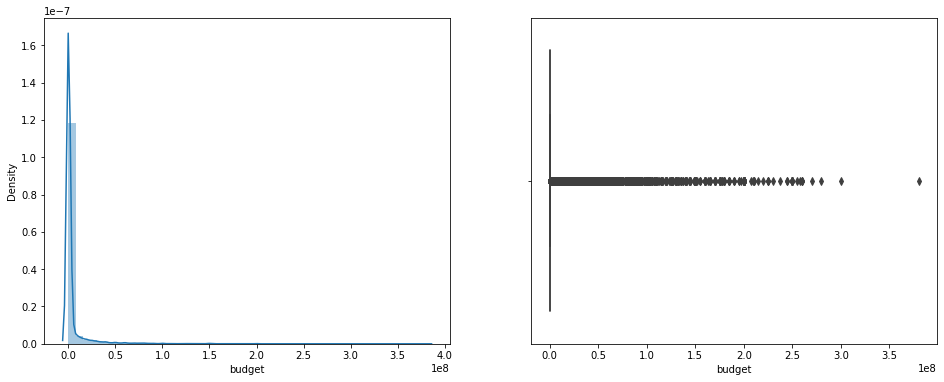

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(movies_metadata_v1['budget'], ax=ax[0])
sns.boxplot(movies_metadata_v1['budget'], ax=ax[1])
plt.show()

> 데이터가 한쪽으로 쏠려있음 확인

In [16]:
movies_metadata_v1['budget'].describe()

count       45454.00000
mean      4225398.78992
std      17425759.82592
min             0.00000
25%             0.00000
50%             0.00000
75%             0.00000
max     380000000.00000
Name: budget, dtype: float64

#### genres
* 장르id 및 장르명이 딕셔너리 문자열 형태로 되어 있음 => 장르id 및 장르명을 추출한 신규 컬럼 각각 추가 생성
* 여러 장르가 복합된 영화에 대한 처리방안 추후 검토 필요

In [17]:
movies_metadata_v1['genres'][0]  # 문자열 형태로 되어 있음 => 변환 필요

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [18]:
import ast

ast.literal_eval(movies_metadata_v1['genres'][0])  # 문자열 evaluate 적용 결과 테스트

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [19]:
# 문자열 evaluate 적용해 장르id 및 장르명을 추출한 'genres_id', 'genres_name' 컬럼 각각 생성
movies_metadata_v1['genres_name'] = movies_metadata_v1['genres'].apply(ast.literal_eval)  # 문자열 그대로 evaluate 적용
movies_metadata_v1['genres_name'] = movies_metadata_v1['genres_name'].apply(lambda x: [v.get('name') for v in x])  # 장르명만 추출

movies_metadata_v1['genres_id'] = movies_metadata_v1['genres'].apply(ast.literal_eval)
movies_metadata_v1['genres_id'] = movies_metadata_v1['genres_id'].apply(lambda x: [v.get('id') for v in x])  # 장르id만 추출

In [20]:
movies_metadata_v1[['genres_id', 'genres_name']]  # 생성된 컬럼 확인

,genres_id,genres_name
0,"[16, 35, 10751]","[Animation, Comedy, Family]"
1,"[12, 14, 10751]","[Adventure, Fantasy, Family]"
2,"[10749, 35]","[Romance, Comedy]"
3,"[35, 18, 10749]","[Comedy, Drama, Romance]"
4,[35],[Comedy]
...,...,...
45461,"[18, 10751]","[Drama, Family]"
45462,[18],[Drama]
45463,"[28, 18, 53]","[Action, Drama, Thriller]"
45464,[],[]


#### homepage
* 해당 영화의 홈페이지 주소 정보이며, null값이 다수 존재함 확인 => 학습 데이터상 제외해도 무방할 것으로 판단

In [21]:
movies_metadata_v1['homepage'].head()

0    http://toystory.disney.com/toy-story
1                                     NaN
2                                     NaN
3                                     NaN
4                                     NaN
Name: homepage, dtype: object

In [22]:
movies_metadata_v1['homepage'].isnull().sum()  # null값이 다수 존재함 확인

37677

#### id
* TMDB 기준 해당 영화의 고유한 id로 확인되나, 중복 데이터가 있어 중복 제외 처리 진행

In [23]:
len(movies_metadata_v1['id']) - movies_metadata_v1['id'].nunique()   # 전체 개수와 고유한 값의 개수가 30개 차이남 확인

30

In [24]:
movies_metadata_v1['id'].value_counts()  # id 기준 일부 중복된 데이터가 있음 확인

141971    3
99080     2
4912      2
15028     2
11115     2
         ..
10870     1
54117     1
4180      1
55135     1
461257    1
Name: id, Length: 45424, dtype: int64

In [25]:
movies_metadata_v1[movies_metadata_v1['id'] == '141971']  # id 중복된 내용 확인 => id 기준으로 중복 데이터 제외 필요

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres_name,genres_id
13261,False,NaN,0.00000,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.41195,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,"[{'name': 'Filmiteollisuus Fine', 'id': 5166}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.00000,108.00000,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.70000,3.00000,"[Thriller, Mystery]","[53, 9648]"
13375,False,NaN,0.00000,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.41195,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,"[{'name': 'Filmiteollisuus Fine', 'id': 5166}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.00000,108.00000,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.70000,3.00000,"[Thriller, Mystery]","[53, 9648]"
16764,False,NaN,0.00000,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.41195,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,"[{'name': 'Filmiteollisuus Fine', 'id': 5166}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.00000,108.00000,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.70000,3.00000,"[Thriller, Mystery]","[53, 9648]"


In [26]:
# id 기준으로 중복된 행 제거
movies_metadata_v1.drop_duplicates(['id'], inplace=True)

len(movies_metadata_v1['id']) - movies_metadata_v1['id'].nunique()  # 중복 데이터 처리 후, 차이 0 확인

0

#### imdb_id
* IMDB 기준 id로 보이며, 17개 null값이 확인됨 => TMDB id가 존재하므로 굳이 해당 null값을 제외할 필요는 없을 것으로 예상됨

In [27]:
movies_metadata_v1['imdb_id'].nunique(), len(movies_metadata_v1['imdb_id'])

(45407, 45424)

In [28]:
movies_metadata_v1['imdb_id'].isnull().sum()  # null값이 17개 존재함

17

In [29]:
movies_metadata_v1[movies_metadata_v1['imdb_id'].isnull()].head()  # null값 데이터 일부 확인

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres_name,genres_id
8966,False,NaN,1000000.00000,"[{'id': 80, 'name': 'Crime'}]",NaN,36337,NaN,en,Delusion,"In this fast-paced, noirish road movie, a comp...",0.15672,/g2o1J0ulttuwovqLc0ho910MR95.jpg,"[{'name': 'Cineville', 'id': 2832}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1991-06-07,0.00000,100.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,She only wanted love. But money's better than ...,Delusion,False,4.80000,3.00000,[Crime],[80]
13757,False,NaN,0.00000,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",NaN,200796,NaN,pl,Show,NaN,0.14982,/jJqBwcV1rG3IfbxPA7dk8BgtZR3.jpg,[],[],2003-03-19,0.00000,NaN,[],Released,NaN,Show,False,6.30000,2.00000,"[Comedy, Thriller]","[35, 53]"
13821,False,"{'id': 75014, 'name': 'How I Unleashed World W...",0.00000,"[{'id': 10769, 'name': 'Foreign'}, {'id': 28, ...",NaN,75015,NaN,pl,Jak rozpętałem drugą wojnę światową: Cz.3 - Wś...,How I Unleashed World War II tells the story o...,0.20247,/1nkuFJmr6FZ510hTurudbmKjLQO.jpg,[],"[{'iso_3166_1': 'PL', 'name': 'Poland'}]",1970-04-06,0.00000,73.00000,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,How I Unleashed World War II Part III: Among F...,False,7.00000,3.00000,"[Foreign, Action, History, Comedy]","[10769, 28, 36, 35]"
17382,False,NaN,2500000.00000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",http://www.delawarepictures.net/dreamkiller/,36663,NaN,en,Dreamkiller,"A team of doctors experiment with a new, highl...",0.03529,NaN,[],[],NaN,0.00000,110.00000,[],Released,Fear is the greatest killer.,Dreamkiller,False,5.00000,1.00000,"[Mystery, Thriller]","[9648, 53]"
17510,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,47116,NaN,en,Víťaz,Tou former boxers meet in the ring again after...,0.00000,/yMCadbpPKxmYdkLdVpvsH0tPIwq.jpg,[],[],1979-03-09,0.00000,78.00000,[],Rumored,NaN,The Winner,False,0.00000,0.00000,"[Drama, Romance, Foreign]","[18, 10749, 10769]"


#### original_language
* 11개 null 데이터 제외 처리 후, 총 89개의 고유한 언어 존재함 확인. 영어가 3만건 이상으로 절대적으로 많이 존재함

In [30]:
# 고유한 값 확인 => null값을 제외하면 총 89개 고유한 값 확인
len(movies_metadata_v1['original_language'].unique()), movies_metadata_v1['original_language'].unique()

(90,
 array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
        'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
        'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
        'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
        'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
        'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
        'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
        'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
        'lb', 'si'], dtype=object))

In [31]:
movies_metadata_v1['original_language'].isnull().sum()  # null값 11개 존재

11

In [32]:
# null값 데이터 제외
movies_metadata_v1 = movies_metadata_v1[movies_metadata_v1['original_language'].notnull()]
movies_metadata_v1['original_language'].isnull().sum()

0

In [33]:
movies_metadata_v1['original_language'].value_counts()[:10]  # 영어가 3만건 이상 존재함

en    32246
fr     2436
it     1528
ja     1347
de     1079
es      993
ru      826
hi      508
ko      444
zh      409
Name: original_language, dtype: int64

#### original_title
* 동일한 title의 데이터가 일부 존재하나, id와 release_date가 서로 다른 각각의 버전이므로 중복 제외하지 않음

In [34]:
movies_metadata_v1['original_title'].value_counts()  # 중복된 데이터가 존재함

Hamlet                                            8
Alice in Wonderland                               8
Macbeth                                           7
The Three Musketeers                              7
Cinderella                                        7
                                                 ..
Молох                                             1
Mensonges Et Trahisons Et Plus Si Affinités...    1
Crossworlds                                       1
Centurion                                         1
Queerama                                          1
Name: original_title, Length: 43352, dtype: int64

In [35]:
# 중복된 title 데이터 샘플 확인 => release_date가 서로 다른 각각의 버전이 존재함 확인
movies_metadata_v1[movies_metadata_v1['original_title'] == 'Hamlet']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres_name,genres_id
1360,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}]",NaN,10549,tt0116477,en,Hamlet,"Hamlet, Prince of Denmark, returns home to fin...",9.99409,/gApBWTMD5N8UVClI7rcqwf6dIrB.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 9...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1996-12-25,0.00000,242.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Hamlet,False,7.30000,118.00000,[Drama],[18]
1832,False,NaN,750000.00000,"[{'id': 18, 'name': 'Drama'}]",NaN,23383,tt0040416,en,Hamlet,"Winner of four Academy Awards, including Best ...",3.18807,/7FdGR0dCkuxbvwHRYSXwkYtB3NK.jpg,"[{'name': 'Two Cities Films', 'id': 4006}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1948-03-25,0.00000,155.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Hamlet,False,7.10000,48.00000,[Drama],[18]
3476,False,NaN,2000000.00000,"[{'id': 18, 'name': 'Drama'}]",NaN,10688,tt0171359,en,Hamlet,Modern day adaptation of Shakespeare's immorta...,12.89620,/a3HqftcLkzbniE3mpDARSYQSXyx.jpg,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-05-12,1568749.00000,112.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Passion, Betrayal, Revenge, A hostile takeover...",Hamlet,False,6.00000,35.00000,[Drama],[18]
3601,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,10264,tt0099726,en,Hamlet,"Hamlet, Prince of Denmark, finds out that his ...",12.50303,/fGn85pj0Ti4vajiTPZZA8xaNLvz.jpg,"[{'name': 'Icon Productions', 'id': 152}, {'na...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1990-12-19,20710451.00000,130.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The extraordinary adaptation of Shakespeare's ...,Hamlet,False,6.70000,95.00000,"[Drama, History]","[18, 36]"
13313,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}]",NaN,125705,tt0243951,en,Hamlet,"To be or not to be, etc.",0.58425,/gr11tPlxuPwGCsIGk7v4OLODeiK.jpg,"[{'name': 'Hallmark Entertainment', 'id': 4056}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-12-10,0.00000,178.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Hamlet,False,0.00000,0.00000,[Drama],[18]
18061,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}]",NaN,42605,tt0064400,en,Hamlet,Tony Richardson's Hamlet is based on his own s...,0.87338,/xePNyhYt9j2f0e38tGagrGdx31k.jpg,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1969-12-21,0.00000,117.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,From the author of,Hamlet,False,6.10000,7.00000,[Drama],[18]
18908,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}]",http://www.bbc.co.uk/hamlet/,28238,tt1449175,en,Hamlet,David Tennant stars in a film of the Royal Sha...,1.68237,/u5sBtExMmlxvWE3aE5oVpjttFrE.jpg,"[{'name': 'NHK Enterprises', 'id': 11376}, {'n...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2009-12-26,0.00000,185.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"To be, or not to be?",Hamlet,False,7.30000,22.00000,[Drama],[18]
21239,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}]",NaN,106848,tt0080835,en,Hamlet,Hamlet comes home from university to find his ...,0.48737,/tIxpyOHUMP9aHX0MI4dVcrp4wLB.jpg,[],[],1980-05-25,0.00000,210.00000,[],Released,NaN,Hamlet,False,4.00000,3.00000,[Drama],[18]


#### overview
* 해당 영화에 대한 개요가 입력된 컬럼으로, 학습 데이터상 제외해도 무방할 것으로 판단

In [36]:
movies_metadata_v1['overview'][0]  # 샘플 데이터 확인

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [37]:
movies_metadata_v1['overview'].isnull().sum()  # null값 953건 존재함

953

#### popularity
* TMDB에서 해당 영화에 대해 종합적으로 산출하는 인기도 지표로 보임(참조 : https://developers.themoviedb.org/3/getting-started/popularity)
* 학습 데이터상 활용 여부는 추후 판단하고자 함

In [38]:
movies_metadata_v1['popularity'] = movies_metadata_v1['popularity'].astype(float)  # float 형변환

<AxesSubplot:xlabel='popularity'>

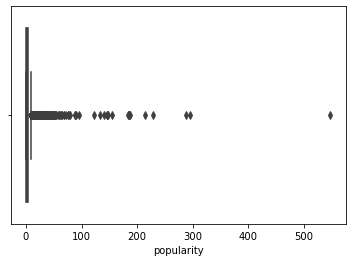

In [39]:
sns.boxplot(movies_metadata_v1['popularity'])

In [40]:
movies_metadata_v1['popularity'].sort_values(ascending=False)

30700   547.48830
33356   294.33704
42222   287.25365
43644   228.03274
24455   213.84991
           ...   
27546     0.00000
42213     0.00000
19729         NaN
29502         NaN
35586         NaN
Name: popularity, Length: 45413, dtype: float64

#### poster_path
* 해당 영화의 포스터이미지 자료로 확인됨 => 학습 데이터상 제외해도 무방할 것으로 판단

In [41]:
movies_metadata_v1['poster_path']

0        /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1        /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2        /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3        /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4        /e64sOI48hQXyru7naBFyssKFxVd.jpg
                       ...               
45461    /jldsYflnId4tTWPx8es3uzsB1I8.jpg
45462    /xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg
45463    /d5bX92nDsISNhu3ZT69uHwmfCGw.jpg
45464    /aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg
45465    /s5UkZt6NTsrS7ZF0Rh8nzupRlIU.jpg
Name: poster_path, Length: 45413, dtype: object

#### production_companies
* 프로덕션id 및 프로덕션명이 딕셔너리 문자열 형태로 되어 있음 => 프로덕션id 및 프로덕션명을 추출한 신규 컬럼 각각 추가 생성
* 여러 프로덕션이 복합된 영화에 대한 처리방안 추후 검토 필요

In [42]:
movies_metadata_v1['production_companies'].isnull().sum()  # null값 3건 존재함 => 전체 개수 대비 매우 적으므로 제외 처리

3

In [43]:
movies_metadata_v1 = movies_metadata_v1[movies_metadata_v1['production_companies'].notnull()]  # null값 제외 처리

In [44]:
movies_metadata_v1['production_companies'][0]

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

In [45]:
# 문자열 evaluate 적용해 프로덕션id 및 프로덕션명을 추출한 'production_id', 'production_name' 컬럼 각각 생성
movies_metadata_v1['production_id'] = movies_metadata_v1['production_companies'].apply(ast.literal_eval)  # 문자열 그대로 evaluate 적용
movies_metadata_v1['production_id'] = movies_metadata_v1['production_id'].apply(lambda x: [v.get('id') for v in x])  # id만 추출

movies_metadata_v1['production_name'] = movies_metadata_v1['production_companies'].apply(ast.literal_eval)
movies_metadata_v1['production_name'] = movies_metadata_v1['production_name'].apply(lambda x: [v.get('name') for v in x])  # name만 추출

In [46]:
movies_metadata_v1[['production_id', 'production_name']]  # 컬럼 생성 결과 확인

,production_id,production_name
0,[3],[Pixar Animation Studios]
1,"[559, 2550, 10201]","[TriStar Pictures, Teitler Film, Interscope Co..."
2,"[6194, 19464]","[Warner Bros., Lancaster Gate]"
3,[306],[Twentieth Century Fox Film Corporation]
4,"[5842, 9195]","[Sandollar Productions, Touchstone Pictures]"
...,...,...
45461,[],[]
45462,[19653],[Sine Olivia]
45463,[6165],[American World Pictures]
45464,[88753],[Yermoliev]


#### production_countries
* 국가 고유 부호 및 국가명이 딕셔너리 문자열 형태로 되어 있음 => 국가 고유 부호 및 국가명을 추출한 신규 컬럼 각각 추가 생성

In [47]:
movies_metadata_v1['production_countries']

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45410, dtype: object

In [48]:
# 문자열 evaluate 적용해 국가 고유부호 및 국가명을 추출한 'prod_countries_code', 'prod_countries_name' 컬럼 각각 생성
movies_metadata_v1['prod_countries_code'] = movies_metadata_v1['production_countries'].apply(ast.literal_eval)  # 문자열 그대로 evaluate 적용
movies_metadata_v1['prod_countries_code'] = movies_metadata_v1['prod_countries_code'].apply(lambda x: [v.get('iso_3166_1') for v in x])  # 고유부호만 추출

movies_metadata_v1['prod_countries_name'] = movies_metadata_v1['production_countries'].apply(ast.literal_eval)
movies_metadata_v1['prod_countries_name'] = movies_metadata_v1['prod_countries_name'].apply(lambda x: [v.get('name') for v in x])  # name만 추출

In [49]:
movies_metadata_v1[['prod_countries_code', 'prod_countries_name']]  # 컬럼 생성 결과 확인

,prod_countries_code,prod_countries_name
0,[US],[United States of America]
1,[US],[United States of America]
2,[US],[United States of America]
3,[US],[United States of America]
4,[US],[United States of America]
...,...,...
45461,[IR],[Iran]
45462,[PH],[Philippines]
45463,[US],[United States of America]
45464,[RU],[Russia]


#### release_date
* 83건의 null값 데이터 내역 확인 및 null값 제외 처리함
* 연도, 월, 일 컬럼 각각 신규 컬럼 생성 => 학습 데이터에는 월 컬럼을 활용해야 할 것으로 판단됨(필요시 추가 검토)

In [50]:
movies_metadata_v1['release_date'].isnull().sum()  # null값 83건 존재함

83

In [51]:
# null값 데이터 내역 확인 => releast_date가 null값인 데이터에 다른 특성 데이터도 없는 경우가 다수 존재함 확인
movies_metadata_v1[movies_metadata_v1['release_date'].isnull()].head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres_name,genres_id,production_id,production_name,prod_countries_code,prod_countries_name
711,False,NaN,0.00000,[],NaN,365371,tt0114894,en,War Stories Our Mother Never Told Us,Seven New Zealand women speak about their live...,0.00562,NaN,[],[],NaN,0.00000,95.00000,[],Released,NaN,War Stories Our Mother Never Told Us,False,0.00000,0.00000,[],[],[],[],[],[]
734,False,NaN,0.00000,[],NaN,215107,tt0105737,en,Vermont Is for Lovers,Vermont is for Lovers is an independently prod...,0.75000,NaN,[],[],NaN,0.00000,88.00000,[],Released,NaN,Vermont Is for Lovers,False,0.00000,0.00000,[],[],[],[],[],[]
3460,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}]",NaN,94214,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.00906,NaN,[],[],NaN,10.00000,90.00000,[],NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",False,0.00000,0.00000,[Drama],[18],[],[],[],[]
3628,False,NaN,0.00000,[],NaN,207731,tt0217287,en,Boricua's Bond,"Tommy, a talented Puerto Rican painter living ...",0.03535,NaN,[],[],NaN,0.00000,105.00000,[],Released,NaN,Boricua's Bond,False,2.00000,1.00000,[],[],[],[],[],[]
5879,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,99885,tt0979876,en,Divine Intervention,Four friends fight an insane man's crusade to ...,0.00118,/iXZ6bn4G3nzGChawX9PLLnjMTqI.jpg,[],[],NaN,0.00000,87.00000,[],Released,His Judgement Cometh...,Divine Intervention,False,0.00000,0.00000,"[Drama, Romance, Foreign]","[18, 10749, 10769]",[],[],[],[]


In [52]:
movies_metadata_v1 = movies_metadata_v1[movies_metadata_v1['release_date'].notnull()]  # null값 제외 처리

In [53]:
movies_metadata_v1['release_date'] = pd.to_datetime(movies_metadata_v1['release_date'])  # datetime으로 변환
movies_metadata_v1['release_year'] = movies_metadata_v1['release_date'].dt.year  # 연도 컬럼 추출
movies_metadata_v1['release_month'] = movies_metadata_v1['release_date'].dt.month  # 월 컬럼 추출
movies_metadata_v1['release_day'] = movies_metadata_v1['release_date'].dt.day  # 일 컬럼 추출

In [54]:
movies_metadata_v1[['release_year', 'release_month', 'release_day']]  # 생성된 컬럼 확인

,release_year,release_month,release_day
0,1995,10,30
1,1995,12,15
2,1995,12,22
3,1995,12,22
4,1995,2,10
...,...,...,...
45460,1991,5,13
45462,2011,11,17
45463,2003,8,1
45464,1917,10,21


#### revenue
* 해당 영화가 벌어드린 수익으로 확인되며, 데이터의 쏠림현상이 나타남 => 학습 시 영화의 성공여부에 대한 판단 지표 중 하나로 활용 예정

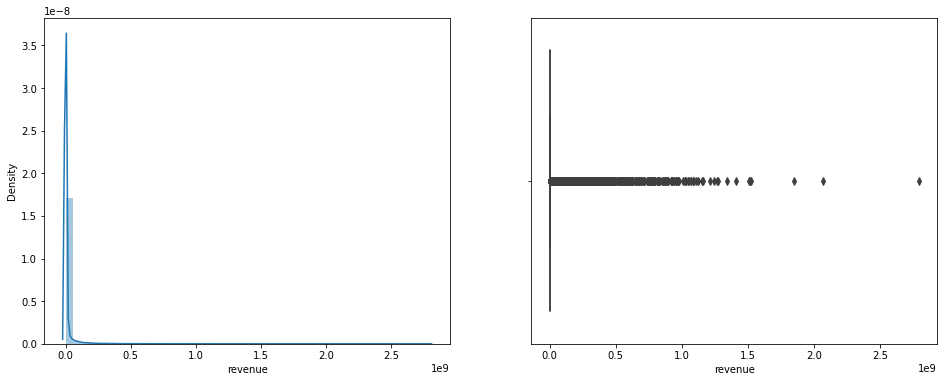

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(movies_metadata_v1['revenue'], ax=ax[0])
sns.boxplot(movies_metadata_v1['revenue'], ax=ax[1])
plt.show()

In [56]:
movies_metadata_v1['revenue'].describe()

count        45327.00000
mean      11238364.02102
std       64422983.38057
min              0.00000
25%              0.00000
50%              0.00000
75%              0.00000
max     2787965087.00000
Name: revenue, dtype: float64

#### runtime
* 해당 영화의 러닝타임(분)으로 확인됨. 영화의 특성을 구분짓는 주요 특성 중 하나이므로 null값 246건은 제외 처리함

In [57]:
# null값 246건 존재함 확인 => runtime은 영화의 주요 특성 중 하나이므로 null값인 데이터는 제외 처리하고자 함
movies_metadata_v1['runtime'].isnull().sum()

246

In [58]:
movies_metadata_v1 = movies_metadata_v1[movies_metadata_v1['runtime'].notnull()]  # null값 제외 처리

In [59]:
movies_metadata_v1['runtime']

0        81.00000
1       104.00000
2       101.00000
3       127.00000
4       106.00000
           ...   
45460   104.00000
45462   360.00000
45463    90.00000
45464    87.00000
45465    75.00000
Name: runtime, Length: 45081, dtype: float64

#### spoken_languages
* 'original_language' 컬럼과 유사해보이나, 차이가 나는 컬럼도 존재함 확인 => 별도 컬럼 구분 필요함
* 언어 고유부호 및 언어명이 딕셔너리 문자열 형태로 되어 있음 => 언어 고유부호 및 언어명을 추출한 신규 컬럼 각각 추가 생성

In [60]:
# 'original_language' 컬럼과 비교 => 유사해보이나, 차이가 나는 컬럼도 존재함 확인
movies_metadata_v1[['original_language', 'spoken_languages']][:10]

,original_language,spoken_languages
0,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
1,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
3,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
4,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
5,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
6,en,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is..."
7,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
8,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
9,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."


In [61]:
# 문자열 evaluate 적용해 언어 고유부호 및 언어명을 추출한 'spoken_lang_code', 'spoken_lang_name' 컬럼 각각 생성
movies_metadata_v1['spoken_lang_code'] = movies_metadata_v1['spoken_languages'].apply(ast.literal_eval)  # 문자열 그대로 evaluate 적용
movies_metadata_v1['spoken_lang_code'] = movies_metadata_v1['spoken_lang_code'].apply(lambda x: [v.get('iso_639_1') for v in x])  # 고유부호만 추출

movies_metadata_v1['spoken_lang_name'] = movies_metadata_v1['spoken_languages'].apply(ast.literal_eval)
movies_metadata_v1['spoken_lang_name'] = movies_metadata_v1['spoken_lang_name'].apply(lambda x: [v.get('name') for v in x])  # name만 추출

In [62]:
movies_metadata_v1[['spoken_lang_code', 'spoken_lang_name']]  # 생성된 컬럼 결과 확인

,spoken_lang_code,spoken_lang_name
0,[en],[English]
1,"[en, fr]","[English, Français]"
2,[en],[English]
3,[en],[English]
4,[en],[English]
...,...,...
45460,[en],[English]
45462,[tl],[]
45463,[en],[English]
45464,[],[]


#### status
* "Released", "Rumored", "Post Production", "In Production", "Planned", "Canceled" 총 6가지 종류 구성 확인(null값 76건 제외 처리)
* budget과 revenue가 0인 3개 그룹("In Production", "Planned", "Canceled")은 학습 데이터에서 제외해야 할 것으로 보임 => 추가 검토 예정

In [63]:
movies_metadata_v1['status'].isnull().sum()  # null값 76건 확인 => 상태값이 불분명하므로 제외 처리

76

In [64]:
movies_metadata_v1 = movies_metadata_v1[movies_metadata_v1['status'].notnull()]  # null값 제외 처리

In [65]:
movies_metadata_v1['status'].value_counts()  # 6가지 종류 및 개수 확인

Released           44649
Rumored              228
Post Production       97
In Production         17
Planned               13
Canceled               1
Name: status, dtype: int64

In [66]:
movies_metadata_v1[movies_metadata_v1['status'] == 'Planned'].head()  # 각 종류별 데이터 샘플 확인

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres_name,genres_id,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,release_day,spoken_lang_code,spoken_lang_name
20108,False,NaN,0.00000,"[{'id': 35, 'name': 'Comedy'}]",NaN,130736,tt2208144,en,3 Zimmer/Küche/Bad,"Eleven moving dates, eight friends: Philipp, W...",1.87683,/5F981JSQz5Qc83G2QZzszwx4ULj.jpg,[{'name': 'teamWorx Produktion für Kino und Fe...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2012-10-03,0.00000,118.00000,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Planned,NaN,3 Zimmer/Küche/Bad,False,7.10000,28.00000,[Comedy],[35],[1479],[teamWorx Produktion für Kino und Fernsehen GmbH],[DE],[Germany],2012,10,3,[de],[Deutsch]
20989,False,NaN,0.00000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",NaN,118931,tt2332523,ja,放課後ミッドナイターズ,Houkago Midnighters is about a human anatomica...,0.45697,/1UgQ8fhjxmPbNUMgIesmPduRGZb.jpg,"[{'name': 'Mont Blanc Pictures', 'id': 40383},...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2012-08-25,0.00000,95.00000,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Planned,NaN,After School Midnighters,False,6.50000,2.00000,"[Fantasy, Animation, Comedy, Family]","[14, 16, 35, 10751]","[40383, 40384]","[Mont Blanc Pictures, KOO-KI]",[JP],[Japan],2012,8,25,[ja],[日本語]
30402,False,"{'id': 14890, 'name': 'Bad Boys Collection', '...",0.00000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,38700,tt1502397,en,Bad Boys for Life,The continuing adventures of Miami detectives ...,2.17855,/2GwwyfykFAf3jKXFWMkBiLgTi3k.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-11-07,0.00000,0.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,Bad Boys for Life,False,0.00000,12.00000,"[Thriller, Action, Crime]","[53, 28, 80]","[5, 34, 130, 2481]","[Columbia Pictures, Sony Pictures, Jerry Bruck...",[US],[United States of America],2018,11,7,[en],[English]
37725,False,NaN,0.00000,"[{'id': 99, 'name': 'Documentary'}]",NaN,359440,tt4651932,en,Barista,Five top baristas find themselves pushing the ...,0.85190,/wWnJeF67i2dVfzP7QFBkASn3XP6.jpg,[],[],2015-11-06,0.00000,103.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,The battle for the perfect cup is on.,Barista,False,6.70000,6.00000,[Documentary],[99],[],[],[],[],2015,11,6,[en],[English]
38107,False,NaN,0.00000,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",http://www.enlightenment-productions.com/despi...,366901,tt2474932,en,Despite the Falling Snow,"In Cold War Moscow, a female spy steals secret...",3.66880,/xfveIBDvr0xi5Uu8RT1AqEY7gBO.jpg,"[{'name': 'Enlightenment Productions', 'id': 1...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2016-01-29,0.00000,113.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,You can betray your country but not your heart.,Despite the Falling Snow,False,4.70000,16.00000,"[Drama, Mystery, Romance, Thriller]","[18, 9648, 10749, 53]","[15073, 67263, 67264]","[Enlightenment Productions, Falling Snow, SK E...","[GB, RS]","[United Kingdom, Serbia]",2016,1,29,[en],[English]


In [67]:
# status 종류별 주요 현황 확인 => budget과 revenue가 0인 3개 그룹은 학습 데이터에서 제외해야 할 것으로 보임(추가 검토 예정)
movies_metadata_v1.pivot_table(
    index=['status'],
    values=['budget', 'revenue', 'vote_average', 'vote_count'],
    aggfunc=np.mean
)

,budget,revenue,vote_average,vote_count
status,,,,
Canceled,0.00000,0.00000,6.30000,3.00000
In Production,0.00000,0.00000,4.55882,32.76471
Planned,0.00000,0.00000,6.10000,15.38462
Post Production,540846.96907,369045.32990,5.09485,17.09278
Released,4296639.76947,11407418.06878,5.64082,111.74248
Rumored,58103.07018,140154.41228,5.38465,6.62719


#### tagline
* 영화의 제목 앞쪽에 붙는 태그라인에 대한 정보로 확인되며, null값 다수 존재함 확인됨 => 학습 데이터상 제외해도 무방할 것으로 판단

In [68]:
movies_metadata_v1['tagline']

0                                                      NaN
1                Roll the dice and unleash the excitement!
2        Still Yelling. Still Fighting. Still Ready for...
3        Friends are the people who let you be yourself...
4        Just When His World Is Back To Normal... He's ...
                               ...                        
45460                                                  NaN
45462                                                  NaN
45463                               A deadly game of wits.
45464                                                  NaN
45465                                                  NaN
Name: tagline, Length: 45005, dtype: object

In [69]:
movies_metadata_v1['tagline'].isnull().sum()  # null값 다수 존재함 확인

24637

#### title
* 해당 영화의 영문 제목으로 확인됨

In [70]:
movies_metadata_v1['title']

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
45460                     Robin Hood
45462            Century of Birthing
45463                       Betrayal
45464               Satan Triumphant
45465                       Queerama
Name: title, Length: 45005, dtype: object

In [71]:
# "original_title" 컬럼과의 차이 확인 =>  "title" 컬럼은 원제목을 영어로 표기한 것으로 확인됨
movies_metadata_v1[movies_metadata_v1['original_title'] != movies_metadata_v1['title']][['original_title', 'title']]

,original_title,title
28,La Cité des Enfants Perdus,The City of Lost Children
29,摇啊摇，摇到外婆桥,Shanghai Triad
32,"Guillaumet, les ailes du courage",Wings of Courage
57,Il postino,The Postman
58,Le confessionnal,The Confessional
...,...,...
45451,Nouvelles luttes extravagantes,The Fat and Lean Wrestling Match
45453,Maa,Mom
45455,San Michele aveva un gallo,St. Michael Had a Rooster
45462,Siglo ng Pagluluwal,Century of Birthing


#### video
* 의미가 명확하지는 않으나, 대부분이 False값이며 True인 건(88건)들의 revenue는 모두 0인 것으로 확인됨 => True인 건들을 제외할지 여부는 추후 판단하고자 함

In [72]:
movies_metadata_v1['video'].value_counts()  # 대부분의 값들이 False인 것으로 확인됨

False    44917
True        88
Name: video, dtype: int64

In [73]:
# 그룹별 주요 특성 확인 => True인 그룹의 revenue는 0인 것으로 확인됨
movies_metadata_v1.pivot_table(index=['video'], values=['budget', 'revenue'])

,budget,revenue
video,,
False,4272349.53445,11340863.41376
True,59712.31818,0.00000


In [74]:
movies_metadata_v1[movies_metadata_v1['video'] == True].head()  # 샘플 데이터 확인

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genres_name,genres_id,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,release_day,spoken_lang_code,spoken_lang_name
5492,False,NaN,0.00000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,15173,tt0298388,en,Jonah: A VeggieTales Movie,"Get ready as Bob the Tomato, Larry the Cucumbe...",1.73418,/iWahPsY3hsKOizZHgzQcAxv4O3B.jpg,"[{'name': 'Big Idea Productions', 'id': 3204}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-10-04,0.00000,82.00000,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_6...",Released,Fresh Fish. Mixed Vegetables.,Jonah: A VeggieTales Movie,True,6.40000,22.00000,"[Action, Adventure, Animation, Comedy, Family,...","[28, 12, 16, 35, 10751, 14, 10749]",[3204],[Big Idea Productions],[US],[United States of America],2002,10,4,"[cs, en]","[Český, English]"
11469,False,"{'id': 123438, 'name': 'Loose Change Collectio...",5000.00000,"[{'id': 99, 'name': 'Documentary'}]",http://www.loosechange911.com/,14277,tt0831315,en,Loose Change: 2nd Edition,What if...September 11th was not a surprise at...,0.65171,/isRGTPFiX8IwM1dNXQ1SUoticvY.jpg,"[{'name': 'Polar Film Medien GmbH', 'id': 52...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-06-01,0.00000,100.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What really happened on 9/11?,Loose Change: 2nd Edition,True,6.30000,16.00000,[Documentary],[99],[5228],[Polar Film Medien GmbH],[US],[United States of America],2006,6,1,[en],[English]
13564,False,NaN,0.00000,"[{'id': 99, 'name': 'Documentary'}]",NaN,284117,tt1198399,en,Fitna,A short film in which Quran verses are shown a...,0.04007,/2xZIYEyp6jUfB8ZMiqvtXRD6tSX.jpg,[],"[{'iso_3166_1': 'NL', 'name': 'Netherlands'}]",2008-03-27,0.00000,15.00000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Fitna,True,1.00000,1.00000,[Documentary],[99],[],[],[NL],[Netherlands],2008,3,27,"[en, nl]","[English, Nederlands]"
14271,False,"{'id': 190135, 'name': 'Love Hina Collection',...",0.00000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,44685,tt0416938,ja,ラブひな 春スペシャル ～キミサクラチルナカレ!!～,"The tests have come, and Keitaro can only hope...",1.78571,/pO535dqMmvatuqbgvpOIA1bQw3R.jpg,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': 'X...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2001-03-31,0.00000,48.00000,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,Spring break... Love Hina Style!!,Love Hina Spring Special - I Wish Your Dream,True,4.70000,3.00000,"[Comedy, Romance, Animation, Music]","[35, 10749, 16, 10402]","[3034, 5937]","[TV Tokyo, Xebec]",[JP],[Japan],2001,3,31,[ja],[日本語]
14608,False,NaN,0.00000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/familyzone/playmobil/,35148,tt1512792,en,Playmobil: The Secret of Pirate Island,"Ahoy, matey! Your Favorite Playmobil toys have...",0.01417,/affnnZunHbXQGxlOGNo2QsGUqnC.jpg,[],[],2009-10-13,0.00000,140.00000,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Playmobil: The Secret of Pirate Island,True,0.00000,0.00000,"[Action, Adventure, Family, Fantasy]","[28, 12, 10751, 14]",[],[],[],[],2009,10,13,"[fr, en, no, pt, th, zh]","[Français, English, Norsk, Português, ภาษาไทย,..."


#### vote_average
* TMDB의 vote average 데이터로 0~10의 값 확인되며, 전체적으로 정규분포와 비슷한 형태이나 학습 시 아웃라이어에 대한 처리가 필요할 것으로 판단됨

In [75]:
movies_metadata_v1['vote_average'].describe()  # 0~10의 값

count   45005.00000
mean        5.63808
std         1.89642
min         0.00000
25%         5.00000
50%         6.00000
75%         6.80000
max        10.00000
Name: vote_average, dtype: float64

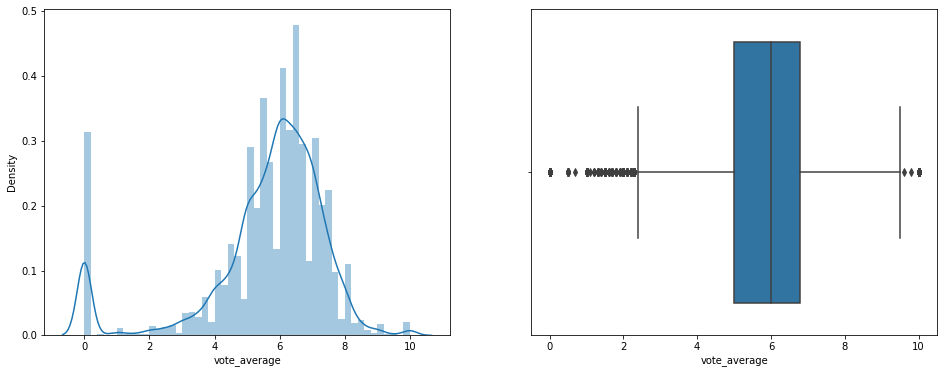

In [76]:
# 분포 확인 => 0점대 부분을 제외하면 전체적으로 정규분포와 비슷한 형태를 나타내고 있음. 학습 시 아웃라이어 처리 필요할 것으로 판단됨
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(movies_metadata_v1['vote_average'], ax=ax[0])
sns.boxplot(movies_metadata_v1['vote_average'], ax=ax[1])
plt.show()

#### vote_count
* TMDB의 vote count 데이터로 한쪽으로 많이 쏠려있는 분포가 확인됨 => 추후 학습 진행 시 데이터 분포 관련 조치 필요

In [77]:
movies_metadata_v1['vote_count'].describe()  # 0~14075값으로, 평균은 111수준이나 편차가 큰 것으로 확인됨

count   45005.00000
mean      110.94587
std       493.67039
min         0.00000
25%         3.00000
50%        10.00000
75%        35.00000
max     14075.00000
Name: vote_count, dtype: float64

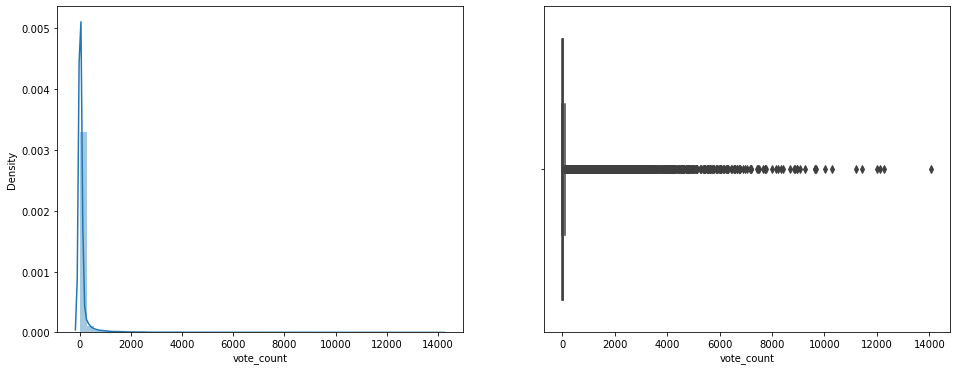

In [78]:
# 분포 확인 => "vote_average"와는 달리 데이터의 쏠림현상이 나타남 확인. 학습 진행 시 조치 필요
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(movies_metadata_v1['vote_count'], ax=ax[0])
sns.boxplot(movies_metadata_v1['vote_count'], ax=ax[1])
plt.show()

### 주요 컬럼 위주로 1차 추출해 데이터프레임 저장 => "movies_metadata_v2"

In [79]:
movies_metadata_v1.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'genres_name', 'genres_id',
       'production_id', 'production_name', 'prod_countries_code',
       'prod_countries_name', 'release_year', 'release_month', 'release_day',
       'spoken_lang_code', 'spoken_lang_name'],
      dtype='object')

In [80]:
col_names = [
    'id', 'title', 'genres_id', 'genres_name', 'original_language', 'spoken_lang_code', 'spoken_lang_name',
    'popularity', 'production_id', 'production_name', 'prod_countries_code', 'prod_countries_name',
    'release_year', 'release_month', 'budget', 'revenue', 'runtime', 
    'status', 'video', 'vote_average', 'vote_count'
]

movies_metadata_v2 = movies_metadata_v1[col_names]
movies_metadata_v2.head()

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count
0,862,Toy Story,"[16, 35, 10751]","[Animation, Comedy, Family]",en,[en],[English],21.94694,[3],[Pixar Animation Studios],[US],[United States of America],1995,10,30000000.00000,373554033.00000,81.00000,Released,False,7.70000,5415.00000
1,8844,Jumanji,"[12, 14, 10751]","[Adventure, Fantasy, Family]",en,"[en, fr]","[English, Français]",17.01554,"[559, 2550, 10201]","[TriStar Pictures, Teitler Film, Interscope Co...",[US],[United States of America],1995,12,65000000.00000,262797249.00000,104.00000,Released,False,6.90000,2413.00000
2,15602,Grumpier Old Men,"[10749, 35]","[Romance, Comedy]",en,[en],[English],11.71290,"[6194, 19464]","[Warner Bros., Lancaster Gate]",[US],[United States of America],1995,12,0.00000,0.00000,101.00000,Released,False,6.50000,92.00000
3,31357,Waiting to Exhale,"[35, 18, 10749]","[Comedy, Drama, Romance]",en,[en],[English],3.85949,[306],[Twentieth Century Fox Film Corporation],[US],[United States of America],1995,12,16000000.00000,81452156.00000,127.00000,Released,False,6.10000,34.00000
4,11862,Father of the Bride Part II,[35],[Comedy],en,[en],[English],8.38752,"[5842, 9195]","[Sandollar Productions, Touchstone Pictures]",[US],[United States of America],1995,2,0.00000,76578911.00000,106.00000,Released,False,5.70000,173.00000


In [81]:
movies_metadata_v2.reset_index(drop=True, inplace=True)  # index 재설정

In [82]:
movies_metadata_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45005 entries, 0 to 45004
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   45005 non-null  object 
 1   title                45005 non-null  object 
 2   genres_id            45005 non-null  object 
 3   genres_name          45005 non-null  object 
 4   original_language    45005 non-null  object 
 5   spoken_lang_code     45005 non-null  object 
 6   spoken_lang_name     45005 non-null  object 
 7   popularity           45005 non-null  float64
 8   production_id        45005 non-null  object 
 9   production_name      45005 non-null  object 
 10  prod_countries_code  45005 non-null  object 
 11  prod_countries_name  45005 non-null  object 
 12  release_year         45005 non-null  int64  
 13  release_month        45005 non-null  int64  
 14  budget               45005 non-null  float64
 15  revenue              45005 non-null 

### 영화 키워드 정보 merge 처리
* keywords.csv 파일을 읽어온 뒤, 문자열로 입력된 keywords 정보를 id와 name별로 구분해 컬럼 생성
* TMDB id 기준으로 기존 메타데이터 데이터프레임과 merge 처리

In [83]:
# keywords.csv 파일 읽어오기
keywords = pd.read_csv('./data/keywords.csv')
keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [84]:
keywords['id'].value_counts()  # 데이터상 중복 데이터가 있음을 확인함

141971    3
159849    3
105045    2
255396    2
85729     2
         ..
55135     1
15877     1
72272     1
1549      1
461257    1
Name: id, Length: 45432, dtype: int64

In [85]:
keywords[keywords['id'] == 159849]  # 중복된 데이터 내역 확인 => id 기준 중복 데이터 제외 필요

,id,keywords
13220,159849,[]
35795,159849,[]
36752,159849,[]


In [86]:
keywords.drop_duplicates('id', inplace=True)  # id 기준 중복 데이터 제외 처리
keywords['id'].value_counts().head()

862       1
74458     1
296206    1
107308    1
16247     1
Name: id, dtype: int64

In [87]:
# 문자열 evaluate 적용해 키워드id 및 키워드명을 추출한 'keywords_id', 'keywords_name' 컬럼 각각 생성
keywords['keywords_id'] = keywords['keywords'].apply(ast.literal_eval)  # 문자열 그대로 evaluate 적용
keywords['keywords_id'] = keywords['keywords_id'].apply(lambda x: [v.get('id') for v in x])  # id만 추출

keywords['keywords_name'] = keywords['keywords'].apply(ast.literal_eval)
keywords['keywords_name'] = keywords['keywords_name'].apply(lambda x: [v.get('name') for v in x])  # name만 추출

In [88]:
keywords.head()  # 컬럼 생성 결과 확인

,id,keywords,keywords_id,keywords_name
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[931, 4290, 5202, 6054, 9713, 9823, 165503, 17...","[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[10090, 10941, 15101, 33467, 158086, 158091]","[board game, disappearance, based on children'..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[1495, 12392, 179431, 208510]","[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[818, 10131, 14768, 15160, 33455]","[based on novel, interracial relationship, sin..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[1009, 1599, 2246, 4995, 5600, 10707, 13149, 3...","[baby, midlife crisis, confidence, aging, daug..."


In [89]:
keywords['id'] = keywords['id'].astype(str)
keywords.drop('keywords', axis=1, inplace=True)
keywords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45432 entries, 0 to 46418
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             45432 non-null  object
 1   keywords_id    45432 non-null  object
 2   keywords_name  45432 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


#### 기존 메타데이터 데이터프레임(movies_metadata_v2)과 Merge 처리

In [90]:
movies_metadata_v2 = pd.merge(movies_metadata_v2, keywords, on='id', how='left')
movies_metadata_v2.head()

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name
0,862,Toy Story,"[16, 35, 10751]","[Animation, Comedy, Family]",en,[en],[English],21.94694,[3],[Pixar Animation Studios],[US],[United States of America],1995,10,30000000.00000,373554033.00000,81.00000,Released,False,7.70000,5415.00000,"[931, 4290, 5202, 6054, 9713, 9823, 165503, 17...","[jealousy, toy, boy, friendship, friends, riva..."
1,8844,Jumanji,"[12, 14, 10751]","[Adventure, Fantasy, Family]",en,"[en, fr]","[English, Français]",17.01554,"[559, 2550, 10201]","[TriStar Pictures, Teitler Film, Interscope Co...",[US],[United States of America],1995,12,65000000.00000,262797249.00000,104.00000,Released,False,6.90000,2413.00000,"[10090, 10941, 15101, 33467, 158086, 158091]","[board game, disappearance, based on children'..."
2,15602,Grumpier Old Men,"[10749, 35]","[Romance, Comedy]",en,[en],[English],11.71290,"[6194, 19464]","[Warner Bros., Lancaster Gate]",[US],[United States of America],1995,12,0.00000,0.00000,101.00000,Released,False,6.50000,92.00000,"[1495, 12392, 179431, 208510]","[fishing, best friend, duringcreditsstinger, o..."
3,31357,Waiting to Exhale,"[35, 18, 10749]","[Comedy, Drama, Romance]",en,[en],[English],3.85949,[306],[Twentieth Century Fox Film Corporation],[US],[United States of America],1995,12,16000000.00000,81452156.00000,127.00000,Released,False,6.10000,34.00000,"[818, 10131, 14768, 15160, 33455]","[based on novel, interracial relationship, sin..."
4,11862,Father of the Bride Part II,[35],[Comedy],en,[en],[English],8.38752,"[5842, 9195]","[Sandollar Productions, Touchstone Pictures]",[US],[United States of America],1995,2,0.00000,76578911.00000,106.00000,Released,False,5.70000,173.00000,"[1009, 1599, 2246, 4995, 5600, 10707, 13149, 3...","[baby, midlife crisis, confidence, aging, daug..."


### 영화 출연진 및 제작진 정보 merge 처리
* credits.csv 파일을 읽어온 뒤, 문자열로 입력된 각 출연진 및 제작진 정보를 id와 name별로 구분해 컬럼 생성
* TMDB id 기준으로 기존 메타데이터 데이터프레임과 merge 처리

In [91]:
credits = pd.read_csv('./data/credits.csv')
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [92]:
credits['id'].value_counts()  # 중복 데이터 존재 확인

141971    3
298721    2
9755      2
10991     2
99080     2
         ..
55135     1
15877     1
72272     1
1549      1
461257    1
Name: id, Length: 45432, dtype: int64

In [93]:
credits.drop_duplicates('id', inplace=True)  # id 기준 중복 데이터 제외 처리
credits['id'].value_counts().head()

862       1
74458     1
296206    1
107308    1
16247     1
Name: id, dtype: int64

In [94]:
credits['cast'][0]  # 해당 내용 중 배우id 및 배우명만 추출해 컬럼으로 저장하고자 함

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [95]:
# 문자열 evaluate 적용해 배우id 및 배우명을 추출한 'cast_id', 'cast_name' 컬럼 각각 생성
credits['cast_id'] = credits['cast'].apply(ast.literal_eval)  # 문자열 그대로 evaluate 적용
credits['cast_id'] = credits['cast_id'].apply(lambda x: [v.get('id') for v in x])  # id만 추출

credits['cast_name'] = credits['cast'].apply(ast.literal_eval)
credits['cast_name'] = credits['cast_name'].apply(lambda x: [v.get('name') for v in x])  # name만 추출

In [96]:
credits.head()  # 컬럼 생성 결과 확인

,cast,crew,id,cast_id,cast_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[2157, 8537, 205, 145151, 5149, 10739, 58563, ...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[6837, 3151, 13567, 16757, 589, 16523, 7166]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[8851, 9780, 18284, 51359, 66804, 352, 87118, ...","[Whitney Houston, Angela Bassett, Loretta Devi..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"[67773, 3092, 519, 70696, 59222, 18793, 14592,...","[Steve Martin, Diane Keaton, Martin Short, Kim..."


In [97]:
credits['crew'][0][:900]  # 제작진 리스트가 매우 다양하므로 우선순위가 높은 5번째까지의 해당 id, job, name만 추출해 컬럼으로 우선 저장하고자 함

"[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'p"

In [98]:
# 문자열 evaluate 적용해 앞에서 5번째까지의 id, job, name만을 추출한 'crew_main' 컬럼 생성
credits['crew_main'] = credits['crew'].apply(ast.literal_eval)  # 문자열 그대로 evaluate 적용
credits['crew_main'] = credits['crew_main'].apply(lambda x: [[v.get('id'), v.get('job'), v.get('name')] for i, v in enumerate(x) if i < 5]) 

In [99]:
credits['crew_main'][0]  # 컬럼 생성 결과 확인

[[7879, 'Director', 'John Lasseter'],
 [12891, 'Screenplay', 'Joss Whedon'],
 [7, 'Screenplay', 'Andrew Stanton'],
 [12892, 'Screenplay', 'Joel Cohen'],
 [12893, 'Screenplay', 'Alec Sokolow']]

In [100]:
credits['id'] = credits['id'].astype(str)
credits.drop('cast', axis=1, inplace=True)  # merge를 위해 cast컬럼은 drop
credits.drop('crew', axis=1, inplace=True)  # merge를 위해 crew컬럼은 drop
credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45432 entries, 0 to 45475
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         45432 non-null  object
 1   cast_id    45432 non-null  object
 2   cast_name  45432 non-null  object
 3   crew_main  45432 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


In [101]:
credits.head()

,id,cast_id,cast_name,crew_main
0,862,"[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[[7879, Director, John Lasseter], [12891, Scre..."
1,8844,"[2157, 8537, 205, 145151, 5149, 10739, 58563, ...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[[511, Executive Producer, Larry J. Franco], [..."
2,15602,"[6837, 3151, 13567, 16757, 589, 16523, 7166]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[[26502, Director, Howard Deutch], [16837, Cha..."
3,31357,"[8851, 9780, 18284, 51359, 66804, 352, 87118, ...","[Whitney Houston, Angela Bassett, Loretta Devi...","[[2178, Director, Forest Whitaker], [5144, Scr..."
4,11862,"[67773, 3092, 519, 70696, 59222, 18793, 14592,...","[Steve Martin, Diane Keaton, Martin Short, Kim...","[[37, Original Music Composer, Alan Silvestri]..."


#### 기존 메타데이터 데이터프레임(movies_metadata_v2)과 Merge 처리

In [102]:
movies_metadata_v2 = pd.merge(movies_metadata_v2, credits, on='id', how='left')
movies_metadata_v2.head()

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main
0,862,Toy Story,"[16, 35, 10751]","[Animation, Comedy, Family]",en,[en],[English],21.94694,[3],[Pixar Animation Studios],[US],[United States of America],1995,10,30000000.00000,373554033.00000,81.00000,Released,False,7.70000,5415.00000,"[931, 4290, 5202, 6054, 9713, 9823, 165503, 17...","[jealousy, toy, boy, friendship, friends, riva...","[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[[7879, Director, John Lasseter], [12891, Scre..."
1,8844,Jumanji,"[12, 14, 10751]","[Adventure, Fantasy, Family]",en,"[en, fr]","[English, Français]",17.01554,"[559, 2550, 10201]","[TriStar Pictures, Teitler Film, Interscope Co...",[US],[United States of America],1995,12,65000000.00000,262797249.00000,104.00000,Released,False,6.90000,2413.00000,"[10090, 10941, 15101, 33467, 158086, 158091]","[board game, disappearance, based on children'...","[2157, 8537, 205, 145151, 5149, 10739, 58563, ...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[[511, Executive Producer, Larry J. Franco], [..."
2,15602,Grumpier Old Men,"[10749, 35]","[Romance, Comedy]",en,[en],[English],11.71290,"[6194, 19464]","[Warner Bros., Lancaster Gate]",[US],[United States of America],1995,12,0.00000,0.00000,101.00000,Released,False,6.50000,92.00000,"[1495, 12392, 179431, 208510]","[fishing, best friend, duringcreditsstinger, o...","[6837, 3151, 13567, 16757, 589, 16523, 7166]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[[26502, Director, Howard Deutch], [16837, Cha..."
3,31357,Waiting to Exhale,"[35, 18, 10749]","[Comedy, Drama, Romance]",en,[en],[English],3.85949,[306],[Twentieth Century Fox Film Corporation],[US],[United States of America],1995,12,16000000.00000,81452156.00000,127.00000,Released,False,6.10000,34.00000,"[818, 10131, 14768, 15160, 33455]","[based on novel, interracial relationship, sin...","[8851, 9780, 18284, 51359, 66804, 352, 87118, ...","[Whitney Houston, Angela Bassett, Loretta Devi...","[[2178, Director, Forest Whitaker], [5144, Scr..."
4,11862,Father of the Bride Part II,[35],[Comedy],en,[en],[English],8.38752,"[5842, 9195]","[Sandollar Productions, Touchstone Pictures]",[US],[United States of America],1995,2,0.00000,76578911.00000,106.00000,Released,False,5.70000,173.00000,"[1009, 1599, 2246, 4995, 5600, 10707, 13149, 3...","[baby, midlife crisis, confidence, aging, daug...","[67773, 3092, 519, 70696, 59222, 18793, 14592,...","[Steve Martin, Diane Keaton, Martin Short, Kim...","[[37, Original Music Composer, Alan Silvestri]..."


In [103]:
movies_metadata_v2 = movies_metadata_v2[movies_metadata_v2['keywords_id'].notnull()]  # null값 1건 제외 처리
movies_metadata_v2.reset_index(drop=True, inplace=True)  # index 재설정

# 데이터프레임 현황(1차 컬럼 정리 버전) => "movies_metadata_v2"
* 고유한 id값 기준 총 45004건의 영화별 26개 컬럼에 대한 데이터프레임

In [104]:
movies_metadata_v2.shape

(45004, 26)

In [105]:
movies_metadata_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45004 entries, 0 to 45003
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   45004 non-null  object 
 1   title                45004 non-null  object 
 2   genres_id            45004 non-null  object 
 3   genres_name          45004 non-null  object 
 4   original_language    45004 non-null  object 
 5   spoken_lang_code     45004 non-null  object 
 6   spoken_lang_name     45004 non-null  object 
 7   popularity           45004 non-null  float64
 8   production_id        45004 non-null  object 
 9   production_name      45004 non-null  object 
 10  prod_countries_code  45004 non-null  object 
 11  prod_countries_name  45004 non-null  object 
 12  release_year         45004 non-null  int64  
 13  release_month        45004 non-null  int64  
 14  budget               45004 non-null  float64
 15  revenue              45004 non-null 

In [106]:
movies_metadata_v2.head()

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main
0,862,Toy Story,"[16, 35, 10751]","[Animation, Comedy, Family]",en,[en],[English],21.94694,[3],[Pixar Animation Studios],[US],[United States of America],1995,10,30000000.00000,373554033.00000,81.00000,Released,False,7.70000,5415.00000,"[931, 4290, 5202, 6054, 9713, 9823, 165503, 17...","[jealousy, toy, boy, friendship, friends, riva...","[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[[7879, Director, John Lasseter], [12891, Scre..."
1,8844,Jumanji,"[12, 14, 10751]","[Adventure, Fantasy, Family]",en,"[en, fr]","[English, Français]",17.01554,"[559, 2550, 10201]","[TriStar Pictures, Teitler Film, Interscope Co...",[US],[United States of America],1995,12,65000000.00000,262797249.00000,104.00000,Released,False,6.90000,2413.00000,"[10090, 10941, 15101, 33467, 158086, 158091]","[board game, disappearance, based on children'...","[2157, 8537, 205, 145151, 5149, 10739, 58563, ...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[[511, Executive Producer, Larry J. Franco], [..."
2,15602,Grumpier Old Men,"[10749, 35]","[Romance, Comedy]",en,[en],[English],11.71290,"[6194, 19464]","[Warner Bros., Lancaster Gate]",[US],[United States of America],1995,12,0.00000,0.00000,101.00000,Released,False,6.50000,92.00000,"[1495, 12392, 179431, 208510]","[fishing, best friend, duringcreditsstinger, o...","[6837, 3151, 13567, 16757, 589, 16523, 7166]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[[26502, Director, Howard Deutch], [16837, Cha..."
3,31357,Waiting to Exhale,"[35, 18, 10749]","[Comedy, Drama, Romance]",en,[en],[English],3.85949,[306],[Twentieth Century Fox Film Corporation],[US],[United States of America],1995,12,16000000.00000,81452156.00000,127.00000,Released,False,6.10000,34.00000,"[818, 10131, 14768, 15160, 33455]","[based on novel, interracial relationship, sin...","[8851, 9780, 18284, 51359, 66804, 352, 87118, ...","[Whitney Houston, Angela Bassett, Loretta Devi...","[[2178, Director, Forest Whitaker], [5144, Scr..."
4,11862,Father of the Bride Part II,[35],[Comedy],en,[en],[English],8.38752,"[5842, 9195]","[Sandollar Productions, Touchstone Pictures]",[US],[United States of America],1995,2,0.00000,76578911.00000,106.00000,Released,False,5.70000,173.00000,"[1009, 1599, 2246, 4995, 5600, 10707, 13149, 3...","[baby, midlife crisis, confidence, aging, daug...","[67773, 3092, 519, 70696, 59222, 18793, 14592,...","[Steve Martin, Diane Keaton, Martin Short, Kim...","[[37, Original Music Composer, Alan Silvestri]..."


#### csv파일로 저장

In [107]:
movies_metadata_v2.to_csv('./data/movies_metadata_v2.csv')

# EDA 및 전처리(2차)

* 예측 지표 선정 및 주요 Feature별 세부검토 진행

#### csv파일 읽어오기

In [108]:
data_v1 = pd.read_csv('./data/movies_metadata_v2.csv', index_col=0)
data_v1.head()

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main
0,862,Toy Story,"[16, 35, 10751]","['Animation', 'Comedy', 'Family']",en,['en'],['English'],21.94694,[3],['Pixar Animation Studios'],['US'],['United States of America'],1995,10,30000000.00000,373554033.00000,81.00000,Released,False,7.70000,5415.00000,"[931, 4290, 5202, 6054, 9713, 9823, 165503, 17...","['jealousy', 'toy', 'boy', 'friendship', 'frie...","[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","[[7879, 'Director', 'John Lasseter'], [12891, ..."
1,8844,Jumanji,"[12, 14, 10751]","['Adventure', 'Fantasy', 'Family']",en,"['en', 'fr']","['English', 'Français']",17.01554,"[559, 2550, 10201]","['TriStar Pictures', 'Teitler Film', 'Intersco...",['US'],['United States of America'],1995,12,65000000.00000,262797249.00000,104.00000,Released,False,6.90000,2413.00000,"[10090, 10941, 15101, 33467, 158086, 158091]","['board game', 'disappearance', ""based on chil...","[2157, 8537, 205, 145151, 5149, 10739, 58563, ...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","[[511, 'Executive Producer', 'Larry J. Franco'..."
2,15602,Grumpier Old Men,"[10749, 35]","['Romance', 'Comedy']",en,['en'],['English'],11.71290,"[6194, 19464]","['Warner Bros.', 'Lancaster Gate']",['US'],['United States of America'],1995,12,0.00000,0.00000,101.00000,Released,False,6.50000,92.00000,"[1495, 12392, 179431, 208510]","['fishing', 'best friend', 'duringcreditssting...","[6837, 3151, 13567, 16757, 589, 16523, 7166]","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","[[26502, 'Director', 'Howard Deutch'], [16837,..."
3,31357,Waiting to Exhale,"[35, 18, 10749]","['Comedy', 'Drama', 'Romance']",en,['en'],['English'],3.85949,[306],['Twentieth Century Fox Film Corporation'],['US'],['United States of America'],1995,12,16000000.00000,81452156.00000,127.00000,Released,False,6.10000,34.00000,"[818, 10131, 14768, 15160, 33455]","['based on novel', 'interracial relationship',...","[8851, 9780, 18284, 51359, 66804, 352, 87118, ...","['Whitney Houston', 'Angela Bassett', 'Loretta...","[[2178, 'Director', 'Forest Whitaker'], [5144,..."
4,11862,Father of the Bride Part II,[35],['Comedy'],en,['en'],['English'],8.38752,"[5842, 9195]","['Sandollar Productions', 'Touchstone Pictures']",['US'],['United States of America'],1995,2,0.00000,76578911.00000,106.00000,Released,False,5.70000,173.00000,"[1009, 1599, 2246, 4995, 5600, 10707, 13149, 3...","['baby', 'midlife crisis', 'confidence', 'agin...","[67773, 3092, 519, 70696, 59222, 18793, 14592,...","['Steve Martin', 'Diane Keaton', 'Martin Short...","[[37, 'Original Music Composer', 'Alan Silvest..."


## 예측 지표 선정 검토
### 예측 지표 선정(안)
1) 순수익 => 관련 컬럼 : "revenue", "budget"
2) 투표평균 => 관련 컬럼 : "vote_average"
3) 투표수 => 관련 컬럼 : "vote_count"


### 예측 지표 1) 순수익 지표 정의 및 검토(안)
* 기존 데이터에 기반해 "profit" 컬럼을 신규 산출해 순수익 지표로 활용
    - 산출식 : revenue - budget

#### 순수익("profit") 컬럼 생성

In [109]:
data_v1['profit'] = data_v1['revenue'] - data_v1['budget']
data_v1['profit'].head()

0   343554033.00000
1   197797249.00000
2           0.00000
3    65452156.00000
4    76578911.00000
Name: profit, dtype: float64

In [110]:
data_v1['profit'].describe()

count        45004.00000
mean       7054732.54006
std       52398977.00378
min     -165710090.00000
25%              0.00000
50%              0.00000
75%              0.00000
max     2550965087.00000
Name: profit, dtype: float64

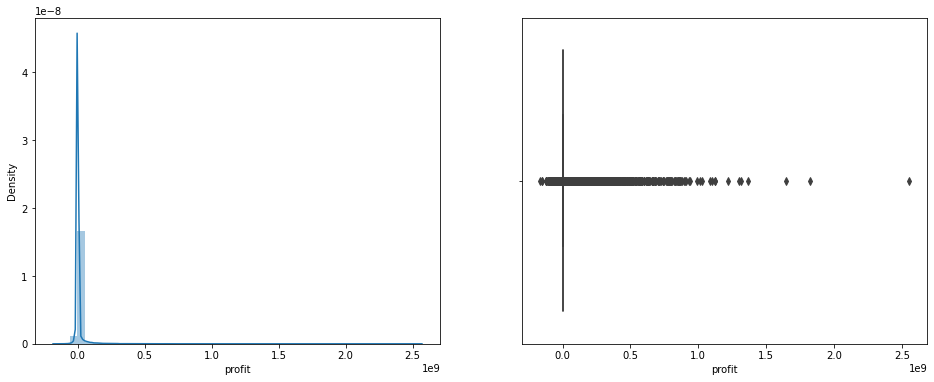

In [111]:
# "profit" 분포 확인 => (+)값부터 (-)까지 존재하며, 쏠림이 매우 크게 나타나는 것으로 확인됨
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(data_v1['profit'], ax=ax[0])
sns.boxplot(data_v1['profit'], ax=ax[1])
plt.show()

In [112]:
# 'status'별 분류 및 현황 확인 => budget 및 revenue가 0인 3개 그룹 총 31건은 제외할 필요가 있다고 판단됨
data_v1.pivot_table(index='status', values=['budget', 'revenue', 'profit'], aggfunc=[np.mean, len])

mean                                 len         \
                       budget        profit        revenue budget profit   
status                                                                     
Canceled              0.00000       0.00000        0.00000      1      1   
In Production         0.00000       0.00000        0.00000     17     17   
Planned               0.00000       0.00000        0.00000     13     13   
Post Production  540846.96907 -171801.63918   369045.32990     97     97   
Released        4296736.00311 7110937.56240 11407673.56551  44648  44648   
Rumored           58103.07018   82051.34211   140154.41228    228    228   

                         
                revenue  
status                   
Canceled              1  
In Production        17  
Planned              13  
Post Production      97  
Released          44648  
Rumored             228

In [113]:
data_v1 = data_v1.query("status == 'Released' or status == 'Rumored' or status =='Post Production'")  # 3개 그룹만 선택
data_v1.shape  # 제외 후 총 44973건 데이터 확인

(44973, 27)

In [114]:
# 각 컬럼별 0인 데이터 개수 체크 => 0인 데이터가 지나지체 많이 존재함
list(data_v1['budget']).count(0), list(data_v1['revenue']).count(0), list(data_v1['profit']).count(0)

(36111, 37583, 34115)

> ### (이슈사항1)
> * 순수익 지표("profit")를 산출하는 "revenue", "budget" 컬럼 자체에 값이 0인 데이터가 너무 많이 존재함
> * 예측 지표로서 "profit"을 활용할지에 대한 검토 및 판단 필요함

### 예측 지표 2) 투표평균("vote_average") 지표 관련 검토

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

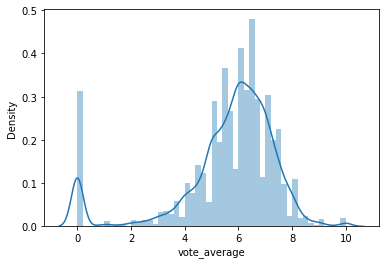

In [115]:
sns.distplot(data_v1['vote_average'])

In [116]:
# vote_average가 0인 데이터의 특성 확인 => 0이 아닌 데이터에 비해 vote_count 건수 자체가 매우 적음
print("vote_average가 0인 데이터의 vote_count 평균 :", data_v1[data_v1['vote_average'] == 0]['vote_count'].mean())
print("vote_average가 0이 아닌 데이터의 vote_count 평균 :", data_v1[data_v1['vote_average'] != 0]['vote_count'].mean())

vote_average가 0인 데이터의 vote_count 평균 : 0.06385242993969492
vote_average가 0이 아닌 데이터의 vote_count 평균 : 118.42717179864307


>  vote_average가 0인 데이터는 관객들로부터 별로 관심을 얻지 못한 영화의 특성을 나타내는 것으로 예상 가능 => 제외할 필요는 없는 것으로 판단됨

#### vote_average 그룹핑 컬럼 생성 => "vote_average_grade" 컬럼
* 10개 grade 분류
* 분류 기준
    - 0이상 1이하 : 0
    - 1초과 2이하 : 1
    - (중간은 동일한 기준 적용)
    - 9초과 10이하 : 10

In [168]:
range_list = [v for v in range(0, 11)]

data_v1['vote_average_grage'] = pd.cut(data_v1['vote_average'], range_list, labels=range_list[:-1], right=True)  # 10개 grade로 나누기
data_v1['vote_average_grage'] = data_v1['vote_average_grage'].fillna(0)  # 0인 값이 NaN으로 표기되므로, NaN값 0으로 입력하기

In [169]:
data_v1['vote_average_grage'].unique()

[7, 6, 5, 3, 8, 2, 4, 0, 9, 1]
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

## 주요 Feature별 세부검토

In [121]:
data_v1.head(2)

,id,title,genres_id,genres_name,original_language,spoken_lang_code,spoken_lang_name,popularity,production_id,production_name,prod_countries_code,prod_countries_name,release_year,release_month,budget,revenue,runtime,status,video,vote_average,vote_count,keywords_id,keywords_name,cast_id,cast_name,crew_main,profit
0,862,Toy Story,"[16, 35, 10751]","['Animation', 'Comedy', 'Family']",en,['en'],['English'],21.94694,[3],['Pixar Animation Studios'],['US'],['United States of America'],1995,10,30000000.00000,373554033.00000,81.00000,Released,False,7.70000,5415.00000,"[931, 4290, 5202, 6054, 9713, 9823, 165503, 17...","['jealousy', 'toy', 'boy', 'friendship', 'frie...","[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","[[7879, 'Director', 'John Lasseter'], [12891, ...",343554033.00000
1,8844,Jumanji,"[12, 14, 10751]","['Adventure', 'Fantasy', 'Family']",en,"['en', 'fr']","['English', 'Français']",17.01554,"[559, 2550, 10201]","['TriStar Pictures', 'Teitler Film', 'Intersco...",['US'],['United States of America'],1995,12,65000000.00000,262797249.00000,104.00000,Released,False,6.90000,2413.00000,"[10090, 10941, 15101, 33467, 158086, 158091]","['board game', 'disappearance', ""based on chil...","[2157, 8537, 205, 145151, 5149, 10739, 58563, ...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","[[511, 'Executive Producer', 'Larry J. Franco'...",197797249.00000


<AxesSubplot:xlabel='vote_average', ylabel='Density'>

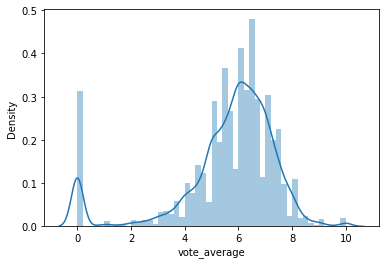

In [122]:
sns.distplot(data_v1['vote_average'])

In [123]:
data_v1['vote_average'].value_counts()

0.00000    2819
6.00000    2431
5.00000    1975
7.00000    1861
6.50000    1709
           ... 
9.10000       2
9.60000       1
9.80000       1
0.70000       1
1.10000       1
Name: vote_average, Length: 92, dtype: int64

### genres_id, genres_name

In [124]:
# 문자열 evaluate 적용해 프로덕션id 및 프로덕션명을 추출한 'production_id', 'production_name' 컬럼 각각 생성
genres_total = data_v1['genres_name'].apply(ast.literal_eval)
list(genres_total)[:10]  # 결과 확인

[['Animation', 'Comedy', 'Family'],
 ['Adventure', 'Fantasy', 'Family'],
 ['Romance', 'Comedy'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Action', 'Adventure', 'Drama', 'Family'],
 ['Action', 'Adventure', 'Thriller'],
 ['Adventure', 'Action', 'Thriller']]

In [125]:
genre_dict = {}

for genres in list(genres_total):
    for genre in genres:
        if genre_dict.get(genre) == None:
            genre_dict[genre] = 1
        else:
            genre_dict[genre] += 1

len(genre_dict), genre_dict

(20,
 {'Animation': 1917,
  'Comedy': 13061,
  'Family': 2749,
  'Adventure': 3475,
  'Fantasy': 2295,
  'Romance': 6703,
  'Drama': 20150,
  'Action': 6567,
  'Crime': 4284,
  'Thriller': 7595,
  'Horror': 4654,
  'History': 1392,
  'Science Fiction': 3022,
  'Mystery': 2457,
  'War': 1315,
  'Foreign': 1608,
  'Music': 1594,
  'Documentary': 3885,
  'Western': 1040,
  'TV Movie': 755})

In [126]:
movies_metadata_v1['production_id'] = movies_metadata_v1['production_id'].apply(lambda x: [v.get('id') for v in x])  # id만 추출

AttributeError: 'int' object has no attribute 'get'

# 학습데이터 생성 및 모델링(1차)

In [ ]:
data_v1['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay', 'kn',
       'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu', 'lb',
       'si'], dtype=object)

In [ ]:
train_col_v1 = ['']

'[16, 35, 10751]'

### 기타 csv파일 내역 => 필요 시 추가반영 검토

In [ ]:
links = pd.read_csv('./data/links.csv')
links

,movieId,imdbId,tmdbId
0,1,114709,862.00000
1,2,113497,8844.00000
2,3,113228,15602.00000
3,4,114885,31357.00000
4,5,113041,11862.00000
...,...,...,...
45838,176269,6209470,439050.00000
45839,176271,2028550,111109.00000
45840,176273,303758,67758.00000
45841,176275,8536,227506.00000


In [ ]:
links_small = pd.read_csv('./data/links_small.csv')
links_small

,movieId,imdbId,tmdbId
0,1,114709,862.00000
1,2,113497,8844.00000
2,3,113228,15602.00000
3,4,114885,31357.00000
4,5,113041,11862.00000
...,...,...,...
9120,162672,3859980,402672.00000
9121,163056,4262980,315011.00000
9122,163949,2531318,391698.00000
9123,164977,27660,137608.00000


In [ ]:
ratings = pd.read_csv('./data/ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,110,1.00000,1425941529
1,1,147,4.50000,1425942435
2,1,858,5.00000,1425941523
3,1,1221,5.00000,1425941546
4,1,1246,5.00000,1425941556
...,...,...,...,...
26024284,270896,58559,5.00000,1257031564
26024285,270896,60069,5.00000,1257032032
26024286,270896,63082,4.50000,1257031764
26024287,270896,64957,4.50000,1257033990


In [ ]:
ratings_small = pd.read_csv('./data/ratings_small.csv')
ratings_small

,userId,movieId,rating,timestamp
0,1,31,2.50000,1260759144
1,1,1029,3.00000,1260759179
2,1,1061,3.00000,1260759182
3,1,1129,2.00000,1260759185
4,1,1172,4.00000,1260759205
...,...,...,...,...
99999,671,6268,2.50000,1065579370
100000,671,6269,4.00000,1065149201
100001,671,6365,4.00000,1070940363
100002,671,6385,2.50000,1070979663
